In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1ea73d1c868b41d9849a0c8bbc170611 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QyqBIsA7UMEWMmSuEua6Hc_P1MEJgu00SScWTcmwgLRQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1ea73d1c868b41d9849a0c8bbc170611.get_object(Bucket='lifezproject-donotdelete-pr-hljh2qcjn7tcjs',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
data.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [6]:
column_names = ['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Population', 'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling']

In [7]:
data.columns = column_names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage Expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under-Five Deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total Expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [8]:
data.corr()

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life Expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant Deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage Expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under-Five Deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [9]:
data1 = data.copy()

In [10]:
data1 = data1.dropna(axis = 0, subset = ['Life Expectancy'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2928 non-null object
Year                               2928 non-null int64
Status                             2928 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2928 non-null int64
Alcohol                            2735 non-null float64
Percentage Expenditure             2928 non-null float64
Hepatitis B                        2375 non-null float64
Measles                            2928 non-null int64
BMI                                2896 non-null float64
Under-Five Deaths                  2928 non-null int64
Polio                              2909 non-null float64
Total Expenditure                  2702 non-null float64
Diphtheria                         2909 non-null float64
HIV/AIDS                           2928 non-null

In [11]:
data1.mean()

Year                               2.007500e+03
Life Expectancy                    6.922493e+01
Adult Mortality                    1.647964e+02
Infant Deaths                      3.040745e+01
Alcohol                            4.614856e+00
Percentage Expenditure             7.403212e+02
Hepatitis B                        8.096084e+01
Measles                            2.427856e+03
BMI                                3.823539e+01
Under-Five Deaths                  4.217930e+01
Polio                              8.254830e+01
Total Expenditure                  5.930163e+00
Diphtheria                         8.232142e+01
HIV/AIDS                           1.747712e+00
GDP                                7.494211e+03
Population                         1.276454e+07
Thinness 1-19 years                4.850622e+00
Thinness 5-9 years                 4.881423e+00
Income Composition of Resources    6.274187e-01
Schooling                          1.199964e+01
dtype: float64

In [12]:
data1 = data1.fillna(data1.mean())
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2928 non-null object
Year                               2928 non-null int64
Status                             2928 non-null object
Life Expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2928 non-null int64
Alcohol                            2928 non-null float64
Percentage Expenditure             2928 non-null float64
Hepatitis B                        2928 non-null float64
Measles                            2928 non-null int64
BMI                                2928 non-null float64
Under-Five Deaths                  2928 non-null int64
Polio                              2928 non-null float64
Total Expenditure                  2928 non-null float64
Diphtheria                         2928 non-null float64
HIV/AIDS                           2928 non-null

In [13]:
data1.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
data1 = data1.drop('Country', axis = 1)
data1.head()

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
data1['Status'] = data1['Status'].map({'Developing' : 0, 'Developed' : 1})

In [16]:
data1.head(5)

,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
column_2 = ['Year', 'Status', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-Five Deaths ', 'Polio',
       'Total Expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness 1-19 years', 'Thinness 5-9 years',
       'Income Composition of Resources', 'Schooling', 'Life Expectancy']

In [18]:
data1 = data1[column_2]
data1.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [19]:
data_preprocessed = data1.copy()

In [20]:
data_preprocessed.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,...,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Life Expectancy
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [21]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2928 non-null int64
Status                             2928 non-null int64
Adult Mortality                    2928 non-null float64
Infant Deaths                      2928 non-null int64
Alcohol                            2928 non-null float64
Percentage Expenditure             2928 non-null float64
Hepatitis B                        2928 non-null float64
Measles                            2928 non-null int64
BMI                                2928 non-null float64
Under-Five Deaths                  2928 non-null int64
Polio                              2928 non-null float64
Total Expenditure                  2928 non-null float64
Diphtheria                         2928 non-null float64
HIV/AIDS                           2928 non-null float64
GDP                                2928 non-null float64
Population                         2928 non-null

In [22]:
data_with_targets = data_preprocessed.copy()

In [23]:
targets = data_with_targets.iloc[:,-1]
targets.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life Expectancy, dtype: float64

In [24]:
targets.shape

(2928,)

In [25]:
inputs = data_with_targets.iloc[:,:-1]
inputs.head()

,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
inputs.shape

(2928, 20)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_test_split(inputs, targets)

[      Year  Status  Adult Mortality  Infant Deaths    Alcohol  \
 2159  2007       0            295.0             20   6.780000   
 1347  2014       0             22.0              5   6.290000   
 2890  2015       0            224.0             37   4.614856   
 1773  2006       0            434.0             78   1.200000   
 2595  2005       0             12.0              0   1.750000   
 1177  2008       1             58.0              0   8.490000   
 7     2008       0            287.0             80   0.030000   
 2862  2011       0            158.0              9   6.740000   
 375   2008       0             84.0              0   0.670000   
 212   2011       0             14.0              0   8.510000   
 2911  2010       0            363.0             30   2.470000   
 143   2000       1             96.0              0  13.200000   
 586   2005       0            144.0             15   4.380000   
 319   2000       0            243.0             15   2.320000   
 424   200

In [29]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, train_size = 0.8, random_state = 20)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
print(x_train.shape, y_train.shape)

(2342, 20) (2342,)


In [31]:
print(x_test.shape, y_test.shape)

(586, 20) (586,)


In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [34]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
regressor.score(x_train, y_train)

0.9917162434333671

In [36]:
pred = regressor.predict(x_test)
pred

array([78.72, 49.76, 80.55, 62.94, 49.51, 73.62, 73.9 , 74.3 , 53.53,
       76.71, 79.6 , 74.18, 55.07, 82.31, 74.22, 74.2 , 72.85, 81.9 ,
       80.39, 75.41, 74.28, 72.61, 52.39, 75.06, 62.86, 83.85, 49.26,
       80.31, 62.15, 70.84, 79.2 , 44.42, 75.08, 64.78, 74.82, 63.35,
       67.88, 57.64, 82.34, 79.75, 54.58, 55.45, 72.93, 63.82, 74.05,
       69.93, 54.8 , 63.34, 56.95, 67.15, 56.46, 76.04, 72.71, 45.93,
       71.96, 76.66, 82.51, 82.34, 52.94, 72.97, 75.68, 56.55, 64.02,
       68.76, 68.38, 83.02, 76.61, 83.34, 64.35, 76.67, 72.27, 60.1 ,
       74.01, 74.86, 62.39, 65.96, 58.21, 79.83, 54.59, 65.35, 57.09,
       72.41, 79.36, 66.  , 73.33, 74.18, 69.49, 72.94, 72.12, 74.78,
       82.76, 54.27, 73.72, 51.73, 64.01, 74.67, 55.84, 61.15, 63.12,
       67.46, 60.08, 67.53, 55.77, 63.77, 64.39, 59.4 , 72.04, 68.76,
       60.13, 47.13, 74.06, 69.49, 63.18, 68.46, 77.15, 67.56, 58.79,
       71.57, 69.64, 78.68, 78.17, 67.32, 70.71, 72.06, 72.52, 62.28,
       53.82, 74.87,

In [37]:
regressor.score(x_test, y_test)

0.9624842170870651

In [38]:
# Checking the null values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
Infant Deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-Five Deaths                    0
Polio                               19
Total Expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income Composition of Resources    167
Schooling                          163
dtype: int64

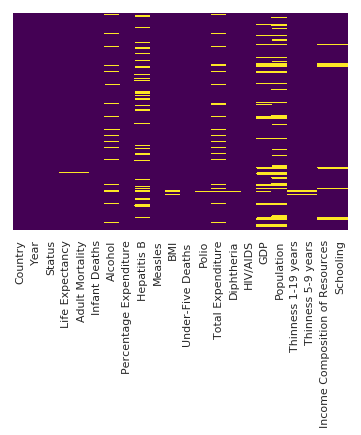

In [39]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Correlation')

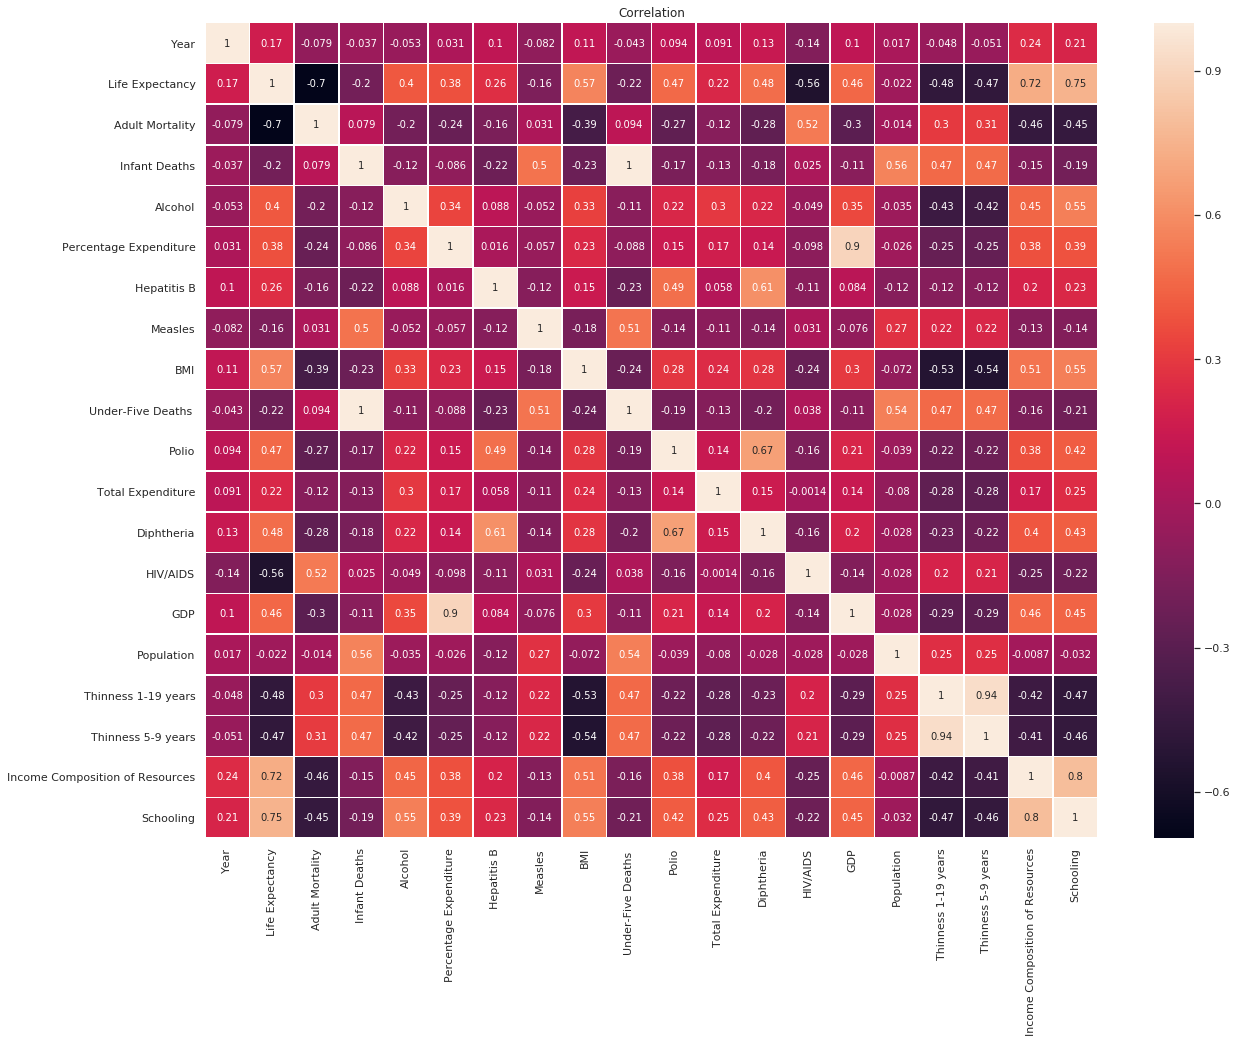

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True, linecolor="white", linewidths=0.5)
plt.title("Correlation")

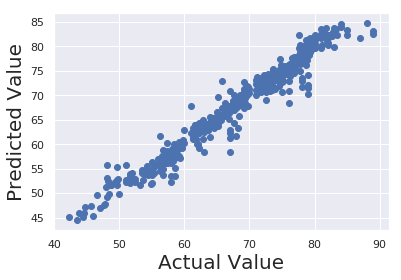

In [41]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Value', fontsize = 20)
plt.ylabel('Predicted Value', fontsize = 20)
plt.show()

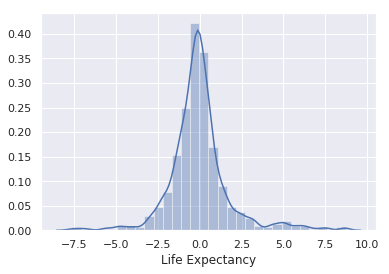

In [42]:
sns.distplot((y_test-pred),bins=30)

In [43]:
from sklearn import metrics

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.156655290102389
MSE: 3.2687901023890786
RMSE: 1.8079795635982943


In [45]:
!pip install watson-machine-learning-client

In [46]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-19 18:25:13,030 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [47]:
wml_credentials = {
    #fill your Service Credentials
}


In [48]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [49]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Narayana Raj G", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "gonarayanraj49@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life Predicting Expectancy"}

In [50]:
model_artifact = client.repository.store_model(regressor, meta_props=model_props)

In [51]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [52]:
published_model_uid

'c6c9171f-5c33-402c-9ce8-98ced4363949'

In [53]:
deployment = client.deployments.create(published_model_uid, name="Life Predicting Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'c6c9171f-5c33-402c-9ce8-98ced4363949' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='70b36464-cb87-4a0b-9162-d1a0d6298fb7'
------------------------------------------------------------------------------------------------




In [54]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [55]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/0b356bff-08fd-4c13-9970-cb3b93470977/deployments/70b36464-cb87-4a0b-9162-d1a0d6298fb7/online'